# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [57]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [24]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [28]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 33
Error on page 34
Error on page 34


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [30]:

#check the length of total reviews extracted
len(reviews)

6500

In [31]:
len(country)

6500

In [32]:

#check the length 
stars = stars[:6500]

In [33]:
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [34]:

df.head()

,reviews,stars,date,country
0,Not Verified | I flew from Malaga via LHR to...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th May 2024,Canada
1,✅ Trip Verified | Milan to Miami return via L...,2,8th May 2024,Italy
2,✅ Trip Verified | BA created a new low-cost s...,1,7th May 2024,United Kingdom
3,✅ Trip Verified | I flew with British Airway...,4,5th May 2024,United Kingdom
4,✅ Trip Verified | Manchester to Copenhagen vi...,2,1st May 2024,Denmark


In [35]:

df.shape

(6500, 4)

In [36]:

import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

# DAtA CLeaning

In [37]:
df.head()


,reviews,stars,date,country
0,Not Verified | I flew from Malaga via LHR to...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th May 2024,Canada
1,✅ Trip Verified | Milan to Miami return via L...,2,8th May 2024,Italy
2,✅ Trip Verified | BA created a new low-cost s...,1,7th May 2024,United Kingdom
3,✅ Trip Verified | I flew with British Airway...,4,5th May 2024,United Kingdom
4,✅ Trip Verified | Manchester to Copenhagen vi...,2,1st May 2024,Denmark


In [38]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [39]:
df['verified']

0       False
1        True
2        True
3        True
4        True
        ...  
6495    False
6496    False
6497    False
6498    False
6499    False
Name: verified, Length: 6500, dtype: bool

In [42]:
import nltk
nltk.download('wordnet')

#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amarv\AppData\Roaming\nltk_data...


In [43]:

# add the corpus to the original dataframe

df['corpus'] = corpus

In [44]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | I flew from Malaga via LHR to...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th May 2024,Canada,False,verified flew malaga via lhr boston th may arr...
1,✅ Trip Verified | Milan to Miami return via L...,2,8th May 2024,Italy,True,milan miami return via london worst business c...
2,✅ Trip Verified | BA created a new low-cost s...,1,7th May 2024,United Kingdom,True,ba created new low cost subsidiary ba euroflye...
3,✅ Trip Verified | I flew with British Airway...,4,5th May 2024,United Kingdom,True,flew british airway heathrow hannover although...
4,✅ Trip Verified | Manchester to Copenhagen vi...,2,1st May 2024,Denmark,True,manchester copenhagen via london th april airc...


In [45]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

Cleaning ratings with stars

In [46]:
#check for unique values
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '2', '1', '4', '6', '10', '7',
       '3', '8', '5', '9', 'None'], dtype=object)

In [47]:
# remove the \t and \n from the ratings
df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [48]:

df.stars.value_counts()

1       1647
2        767
3        762
8        621
10       500
7        498
9        486
5        455
4        442
6        319
None       3
Name: stars, dtype: int64

In [49]:

# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)

In [50]:

#check the unique values again
df.stars.unique()

array(['5', '2', '1', '4', '6', '10', '7', '3', '8', '9'], dtype=object)


Check for null Values

In [51]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     6497
dtype: int64

In [52]:
df.country.isnull().value_counts()

False    6497
Name: country, dtype: int64

In [53]:
#drop the rows using index where the country value is null
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [54]:
df.shape

(6497, 6)

In [55]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,Not Verified | I flew from Malaga via LHR to...,5,8th May 2024,Canada,False,verified flew malaga via lhr boston th may arr...
1,✅ Trip Verified | Milan to Miami return via L...,2,8th May 2024,Italy,True,milan miami return via london worst business c...
2,✅ Trip Verified | BA created a new low-cost s...,1,7th May 2024,United Kingdom,True,ba created new low cost subsidiary ba euroflye...
3,✅ Trip Verified | I flew with British Airway...,4,5th May 2024,United Kingdom,True,flew british airway heathrow hannover although...
4,✅ Trip Verified | Manchester to Copenhagen vi...,2,1st May 2024,Denmark,True,manchester copenhagen via london th april airc...
...,...,...,...,...,...,...
6492,LHR-FCO. Flew out Club Europe courtesy of a re...,9,1st October 2014,United Kingdom,False,lhr fco flew club europe courtesy reduced fare...
6493,Flew BA055 LHR to JNB on the new A380. What an...,1,1st October 2014,United Kingdom,False,flew ba lhr jnb new absolute pleasure seat h f...
6494,Rome to London Gatwick. Delayed take-off from ...,9,28th September 2014,United Kingdom,False,rome london gatwick delayed take rome largely ...
6495,LHR-Hannover Germany. You really wonder someti...,4,28th September 2014,United Kingdom,False,lhr hannover germany really wonder sometimes b...


In [56]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

In [58]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)


In [59]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | I flew from Malaga via LHR to...,5,8th May 2024,Canada,False,verified flew malaga via lhr boston th may arr...
1,✅ Trip Verified | Milan to Miami return via L...,2,8th May 2024,Italy,True,milan miami return via london worst business c...
2,✅ Trip Verified | BA created a new low-cost s...,1,7th May 2024,United Kingdom,True,ba created new low cost subsidiary ba euroflye...
3,✅ Trip Verified | I flew with British Airway...,4,5th May 2024,United Kingdom,True,flew british airway heathrow hannover although...
4,✅ Trip Verified | Manchester to Copenhagen vi...,2,1st May 2024,Denmark,True,manchester copenhagen via london th april airc...


In [61]:
df.stars.mean()

4.502385716484532

Text(0.5, 0.98, 'Counts for each ratings')

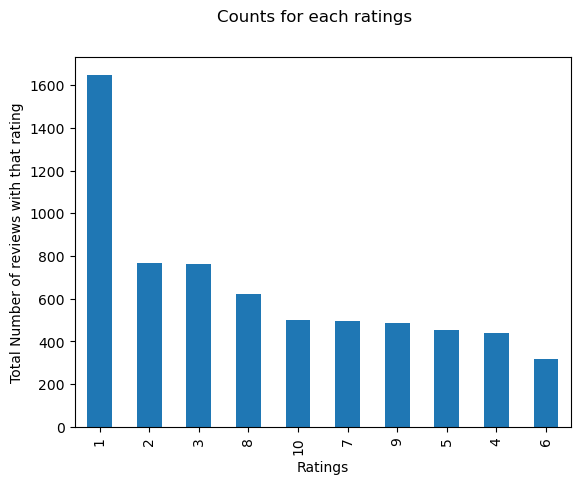

In [62]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [63]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [64]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [65]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [66]:
df.head()

,reviews,stars,date,country,verified,corpus
0,Not Verified | I flew from Malaga via LHR to...,5,8th May 2024,Canada,False,verified flew malaga via lhr boston th may arr...
1,✅ Trip Verified | Milan to Miami return via L...,2,8th May 2024,Italy,True,milan miami return via london worst business c...
2,✅ Trip Verified | BA created a new low-cost s...,1,7th May 2024,United Kingdom,True,ba created new low cost subsidiary ba euroflye...
3,✅ Trip Verified | I flew with British Airway...,4,5th May 2024,United Kingdom,True,flew british airway heathrow hannover although...
4,✅ Trip Verified | Manchester to Copenhagen vi...,2,1st May 2024,Denmark,True,manchester copenhagen via london th april airc...


In [67]:

df_ratings

,Stars,total_counts,pct_values
0,1,1647,25.35
1,2,767,11.81
2,3,762,11.73
3,8,621,9.56
4,10,500,7.70
5,7,498,7.67
6,9,486,7.48
7,5,455,7.00
8,4,442,6.80
9,6,319,4.91


Text(0.5, 1.0, 'Counts for each ratings')

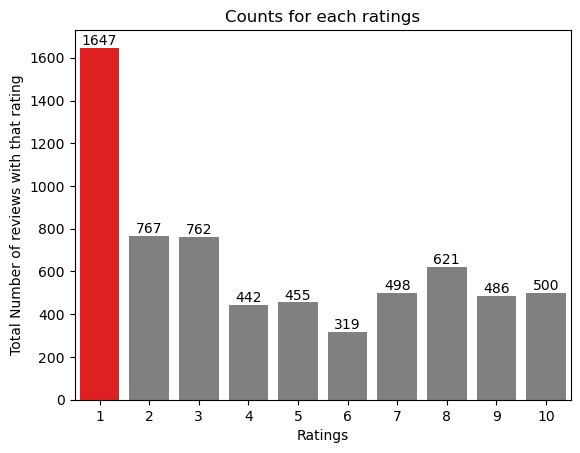

In [68]:

clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [69]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [70]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

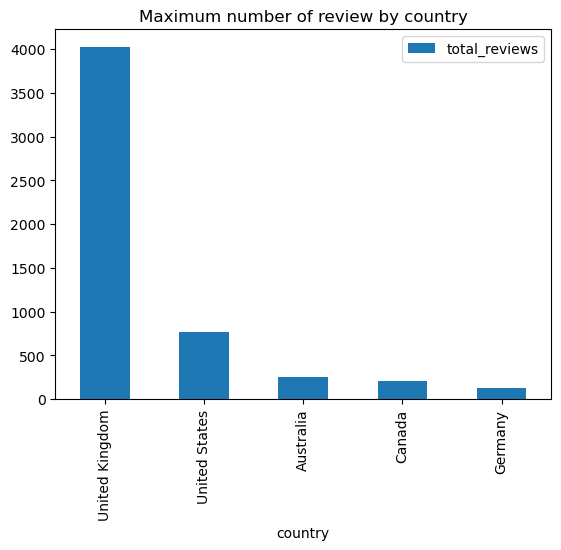

In [71]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

C:\Users\amarv\AppData\Local\Temp\ipykernel_21448\332556558.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

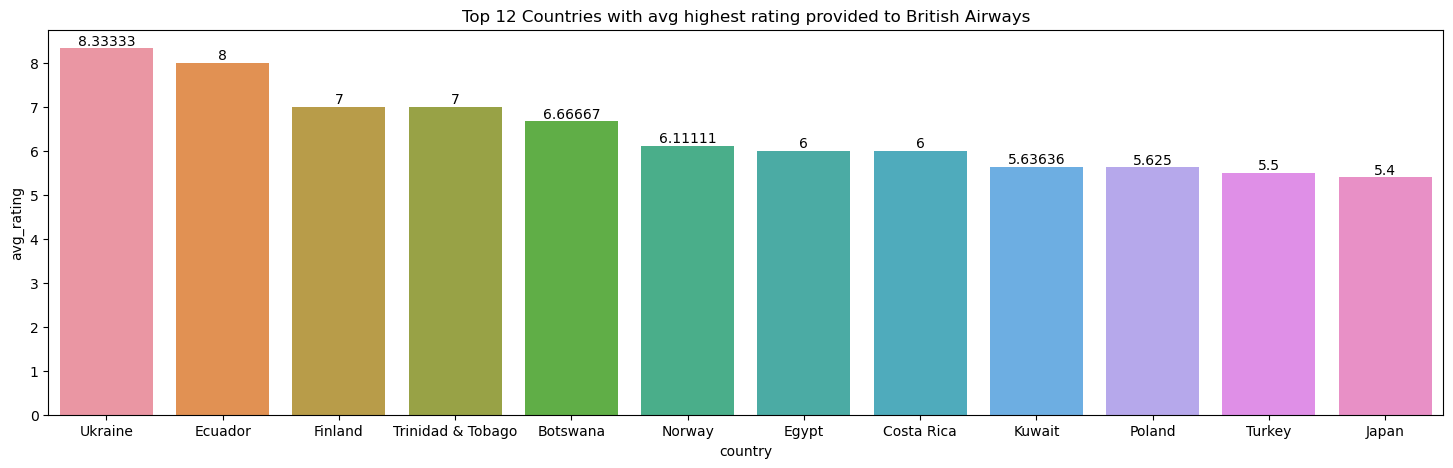

In [72]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")


In [73]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

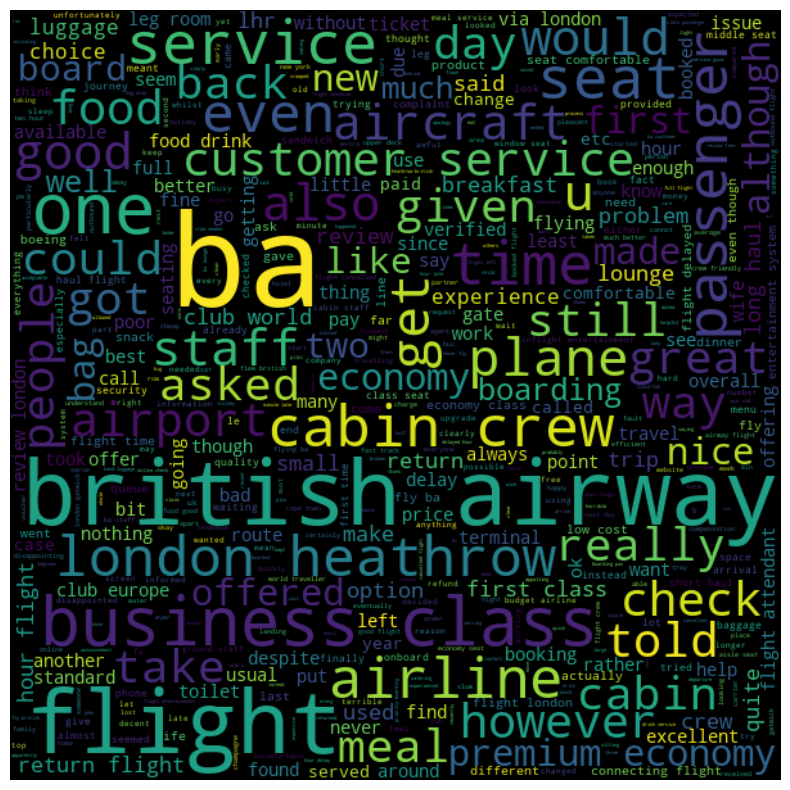

In [74]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

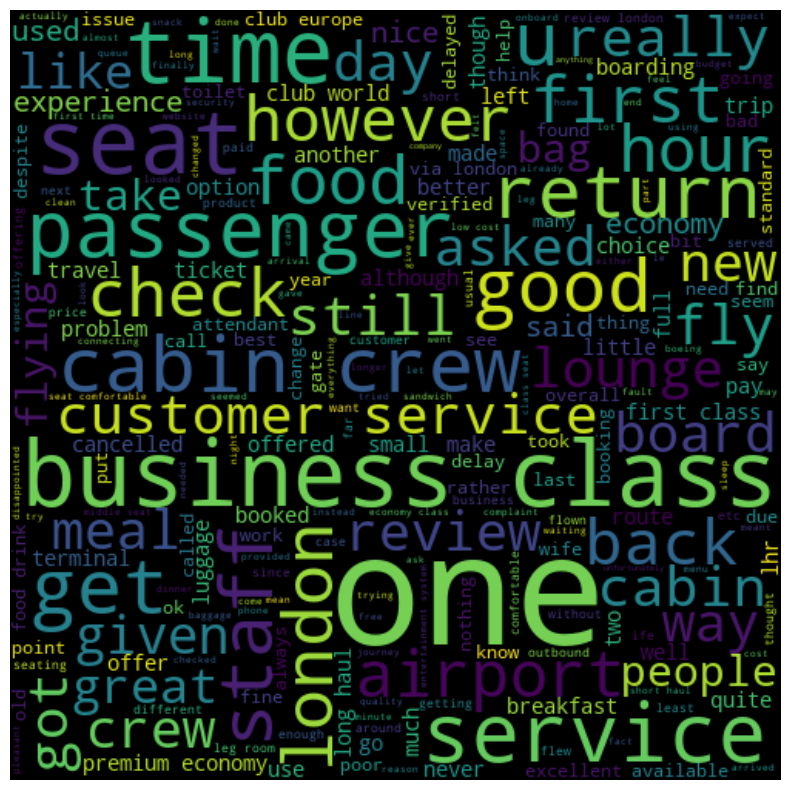

In [75]:

import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [79]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'class'),
  Text(7, 0, 'hour'),
  Text(8, 0, 'good'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'customer'),
  Text(17, 0, 'return'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'club')])

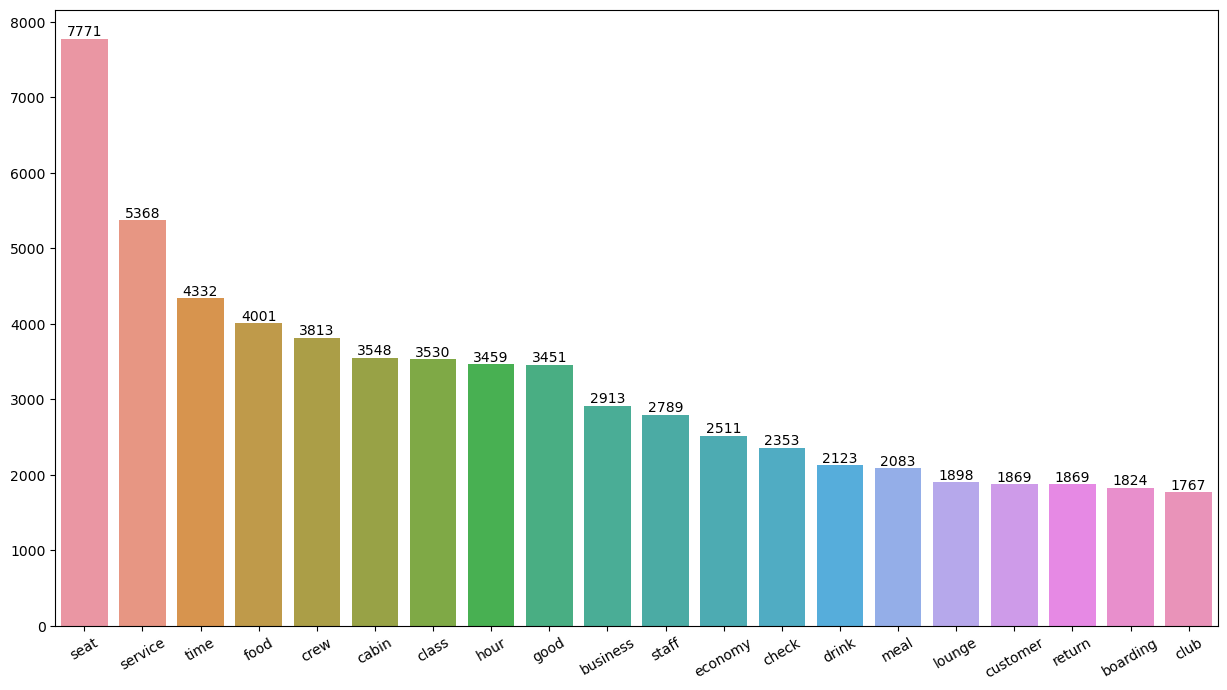

In [80]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

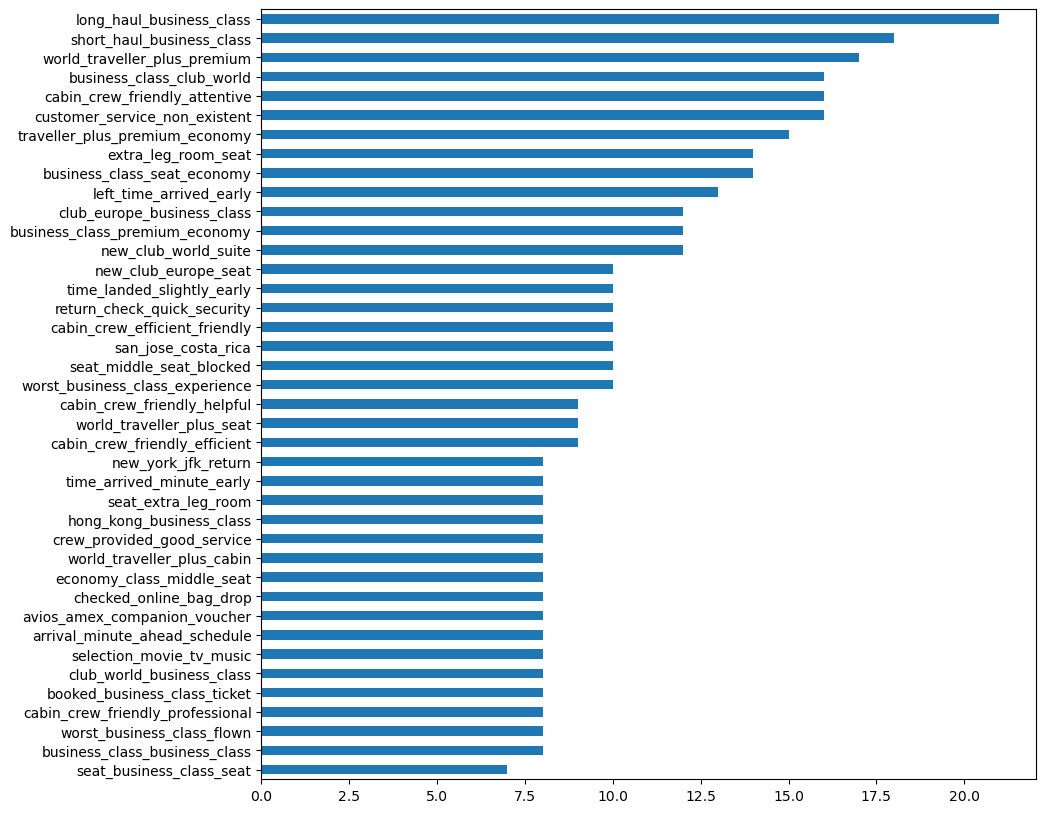

In [81]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams,

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

<Axes: >

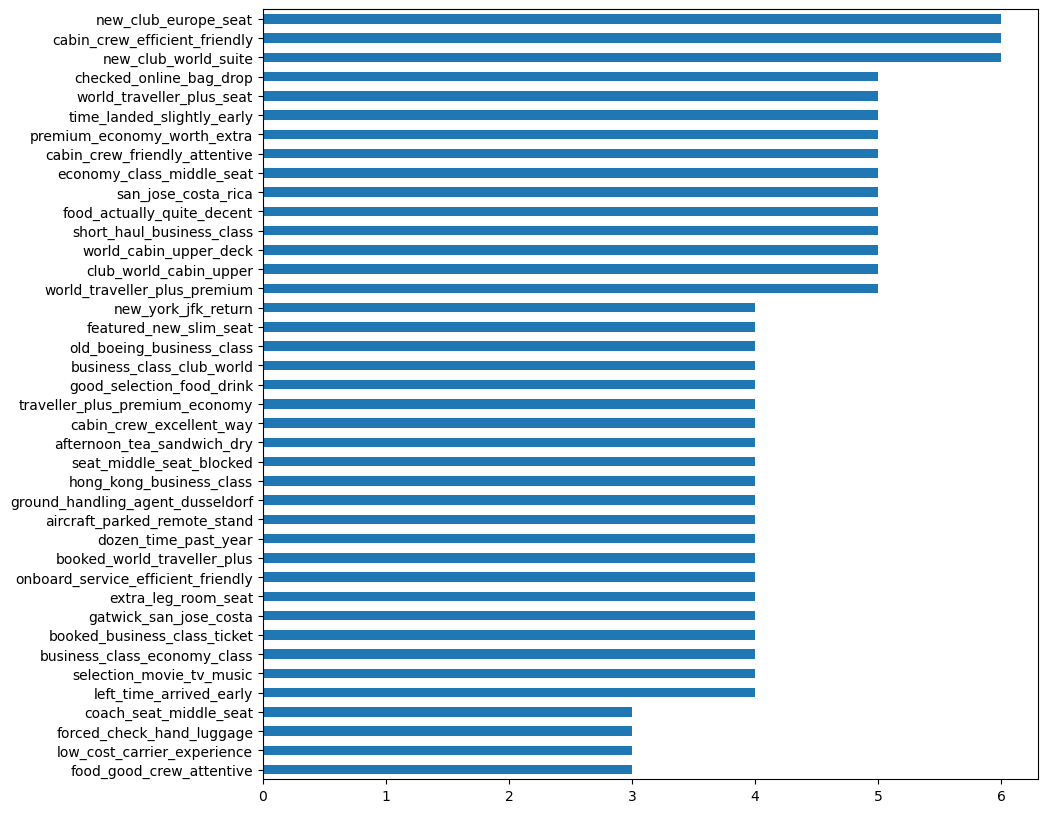

In [83]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

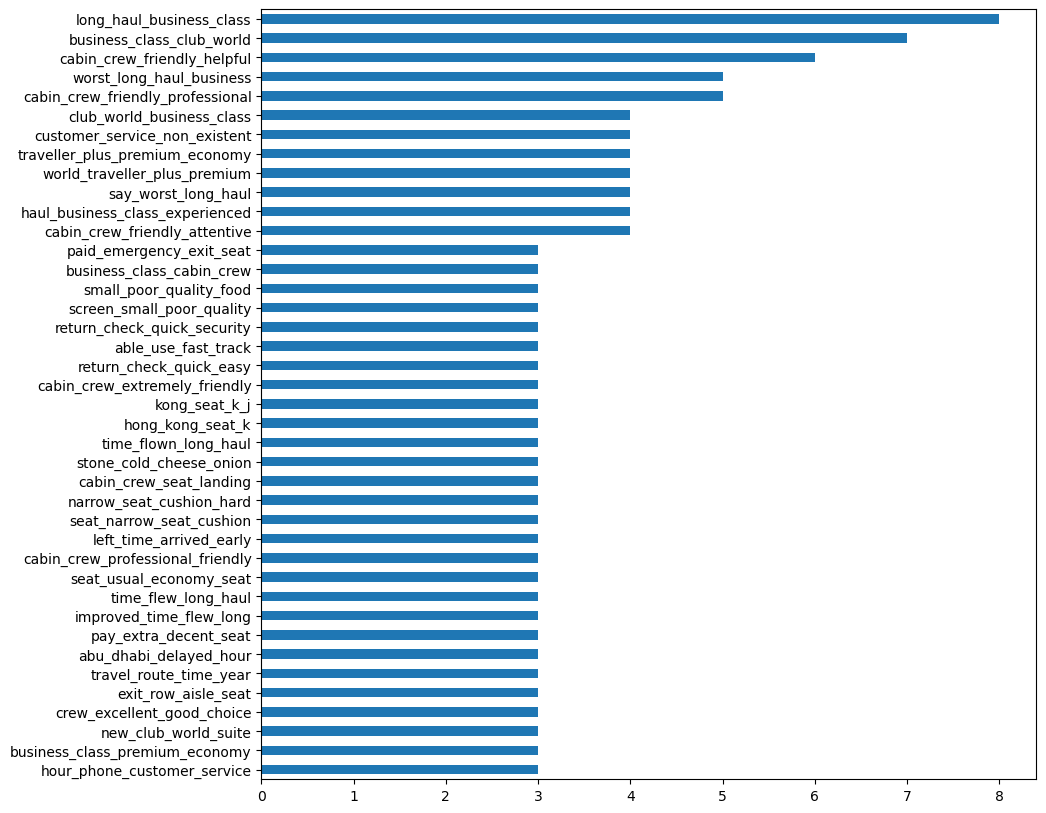

In [84]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

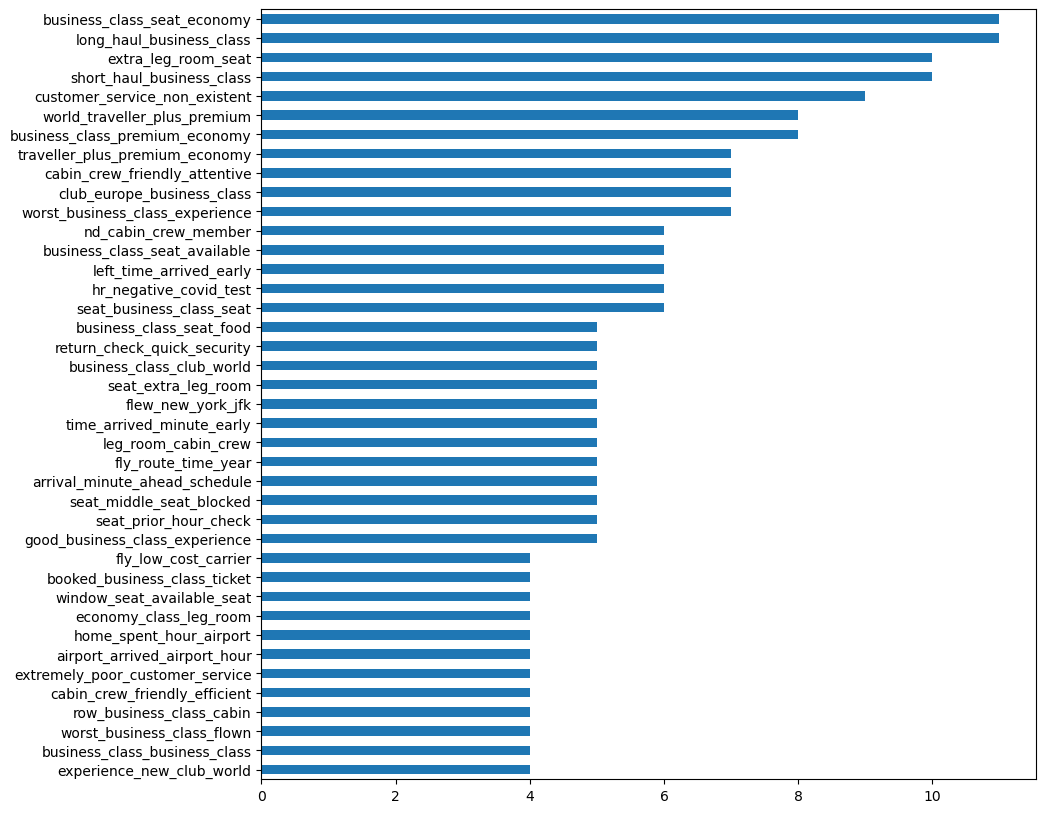

In [85]:

new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [88]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity

In [89]:
# let's see how many texts are with positive comments

print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

4522 number of reviews between -0.2 and 0.2 polarity score
2643 number of reviews between -0.1 and 0.1 polarity score


In [111]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the DataFrame from the CSV file
df = pd.read_csv('cleaned-BA-reviews.csv')

# Convert DataFrame column to a list of strings
text_data = df['corpus'].tolist()

# Initialize the VADER sentiment analyzer
vds = SentimentIntensityAnalyzer()

# Initialize an empty column 'label' with all 0 values
df['label'] = 0

# Iterate over each text in the list
for i, text in enumerate(text_data):
    score = vds.polarity_scores(text)['compound']
    if score > 0.2:
        df.loc[i, 'label'] = 1
    elif score < 0:
        df.loc[i, 'label'] = -1
    else:
        df.loc[i, 'label'] = 0


In [112]:
df.label.value_counts()

 1    4030
-1    2238
 0     229
Name: label, dtype: int64

In [115]:

%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [116]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [117]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,1619.2,ba,946.6,flight,660.0,seat,4640.0,flight,4201.9,flight,1082.0,flight,1077.8,flight,2859.2
1,crew,1121.8,service,684.1,ba,603.3,ba,2503.6,ba,1440.7,seat,802.2,ba,850.9,good,2099.0
2,drink,879.4,british,666.7,call,540.1,class,2407.4,hour,929.6,ba,754.3,hour,670.8,crew,1465.2
3,ba,867.3,airway,656.4,told,511.4,flight,2223.0,london,882.0,business,631.8,london,379.8,service,1325.5
4,service,850.0,customer,639.0,would,463.7,business,1808.6,time,842.3,class,595.9,plane,373.4,food,1300.9
5,cabin,803.1,airline,546.9,customer,461.7,food,1479.3,airway,760.7,check,523.0,delay,281.4,cabin,1177.2
6,meal,643.6,flight,506.9,british,377.0,airway,1343.0,british,758.2,economy,522.1,airport,267.1,time,1168.3
7,food,642.1,staff,458.7,airway,375.4,british,1319.9,check,710.5,boarding,474.6,get,266.7,seat,1062.7
8,seat,622.9,london,401.1,refund,367.9,first,1242.1,day,659.7,passenger,432.2,time,264.4,lounge,990.2
9,time,582.2,one,284.7,get,361.0,economy,1211.2,bag,589.0,lounge,394.0,passenger,256.0,drink,890.4


In [118]:

from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.03197894, 0.02659991],
       [0.        , 0.23820942],
       [0.05522482, 0.39280212],
       ...,
       [0.00424317, 0.07746836],
       [0.08878784, 0.06210301],
       [0.09475614, 0.13267149]])

In [119]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [120]:

df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,37.3,seat,14.0
1,ba,12.6,ba,8.0
2,hour,8.8,class,6.5
3,time,6.8,business,5.2
4,london,6.7,service,5.1
5,airway,6.5,food,5.0
6,british,6.5,cabin,4.9
7,service,6.0,crew,4.6
8,would,5.5,good,4.4
9,day,4.9,economy,3.9


In [ ]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,1619.2,ba,946.6,flight,660.0,seat,4640.0,flight,4201.9,flight,1082.0,flight,1077.8,flight,2859.2
1,crew,1121.8,service,684.1,ba,603.3,ba,2503.6,ba,1440.7,seat,802.2,ba,850.9,good,2099.0
2,drink,879.4,british,666.7,call,540.1,class,2407.4,hour,929.6,ba,754.3,hour,670.8,crew,1465.2
3,ba,867.3,airway,656.4,told,511.4,flight,2223.0,london,882.0,business,631.8,london,379.8,service,1325.5
4,service,850.0,customer,639.0,would,463.7,business,1808.6,time,842.3,class,595.9,plane,373.4,food,1300.9
5,cabin,803.1,airline,546.9,customer,461.7,food,1479.3,airway,760.7,check,523.0,delay,281.4,cabin,1177.2
6,meal,643.6,flight,506.9,british,377.0,airway,1343.0,british,758.2,economy,522.1,airport,267.1,time,1168.3
7,food,642.1,staff,458.7,airway,375.4,british,1319.9,check,710.5,boarding,474.6,get,266.7,seat,1062.7
8,seat,622.9,london,401.1,refund,367.9,first,1242.1,day,659.7,passenger,432.2,time,264.4,lounge,990.2
9,time,582.2,one,284.7,get,361.0,economy,1211.2,bag,589.0,lounge,394.0,passenger,256.0,drink,890.4


In [122]:
#get current working directory

cwd = os.getcwd()

#read the csv

df = pd.read_csv(cwd + "/customer_booking.csv",  encoding="ISO-8859-1")


In [123]:

df.shape

(50000, 14)

In [124]:

df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [125]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [126]:
per_internet = df.sales_channel.value_counts().values[0]  / df.sales_channel.count() *100
per_mobile = df.sales_channel.value_counts().values[1]  / df.sales_channel.count() *100


In [127]:
print(f"Number of bookings done through internet: {per_internet} %")
print(f"Number of bookings done through phone call: {per_mobile} %")

Number of bookings done through internet: 88.764 %
Number of bookings done through phone call: 11.236 %


In [128]:
per_round = df.trip_type.value_counts().values[0]/ df.trip_type.count() *100
per_oneway = df.trip_type.value_counts().values[1]/ df.trip_type.count() *100
per_circle = df.trip_type.value_counts().values[2]/ df.trip_type.count() *100

In [129]:
print(f"Percentage of round trips: {per_round} %")
print(f"Percentage of One way trips: {per_oneway} %")
print(f"Percentage of circle trips: {per_circle} %")


Percentage of round trips: 98.994 %
Percentage of One way trips: 0.774 %
Percentage of circle trips: 0.232 %


<Axes: xlabel='purchase_lead', ylabel='Count'>

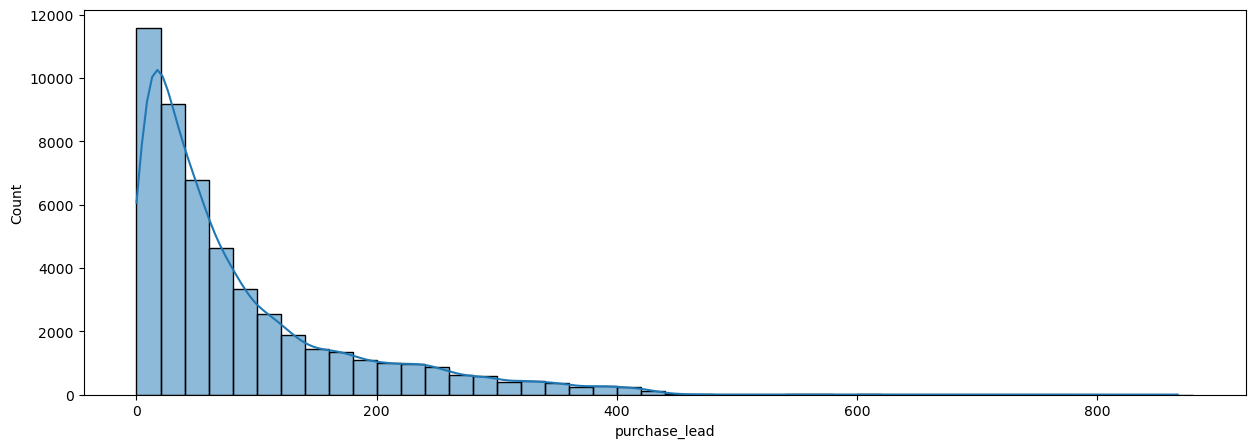

In [130]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="purchase_lead", binwidth=20,kde=True)

In [131]:
(df.purchase_lead >600).value_counts()

False    49992
True         8
Name: purchase_lead, dtype: int64

In [132]:

df[df.purchase_lead > 600]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
835,3,Internet,RoundTrip,641,46,6,Sun,AKLKUL,Malaysia,1,0,1,8.83,1
6148,1,Internet,RoundTrip,614,19,11,Wed,COKMEL,Australia,0,0,0,8.83,0
24119,1,Internet,RoundTrip,704,23,8,Tue,PNHSYD,Australia,0,0,0,8.58,0
38356,2,Internet,RoundTrip,633,5,10,Sat,HKTOOL,Australia,0,0,1,8.83,0
39417,1,Mobile,RoundTrip,625,5,15,Fri,ICNRGN,Myanmar (Burma),0,0,0,6.62,0
42916,1,Mobile,RoundTrip,605,6,18,Thu,BLRMEL,India,0,0,0,8.83,0
46716,2,Internet,RoundTrip,606,6,6,Fri,HKTTPE,United States,0,0,1,4.67,0
48259,3,Internet,RoundTrip,867,6,7,Mon,KIXMLE,Japan,0,0,1,7.00,1


<Axes: xlabel='length_of_stay', ylabel='Count'>

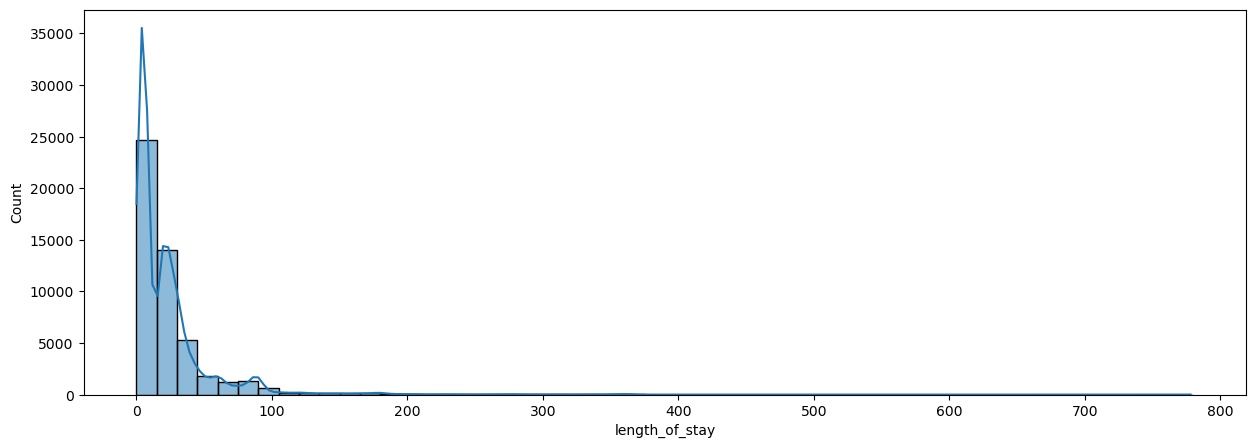

In [133]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="length_of_stay", binwidth=15,kde=True)

In [134]:
(df.length_of_stay> 200).value_counts()

False    49721
True       279
Name: length_of_stay, dtype: int64

In [135]:
df[df.length_of_stay> 500].booking_complete.value_counts()

0    9
1    1
Name: booking_complete, dtype: int64

In [136]:

#filtering the data to have only length of stay days less than 500 days
df = df[df.purchase_lead <500 ]

In [137]:

mapping = {
    "Mon" : 1,
    "Tue" : 2,
    "Wed" : 3,
    "Thu" : 4,
    "Fri" : 5,
    "Sat" : 6,
    "Sun" : 7
}

df.flight_day = df.flight_day.map(mapping)

In [138]:

df.flight_day.value_counts()

1    8100
3    7671
2    7670
4    7423
5    6759
7    6550
6    5809
Name: flight_day, dtype: int64

Text(0, 0.5, 'Number of bookings')

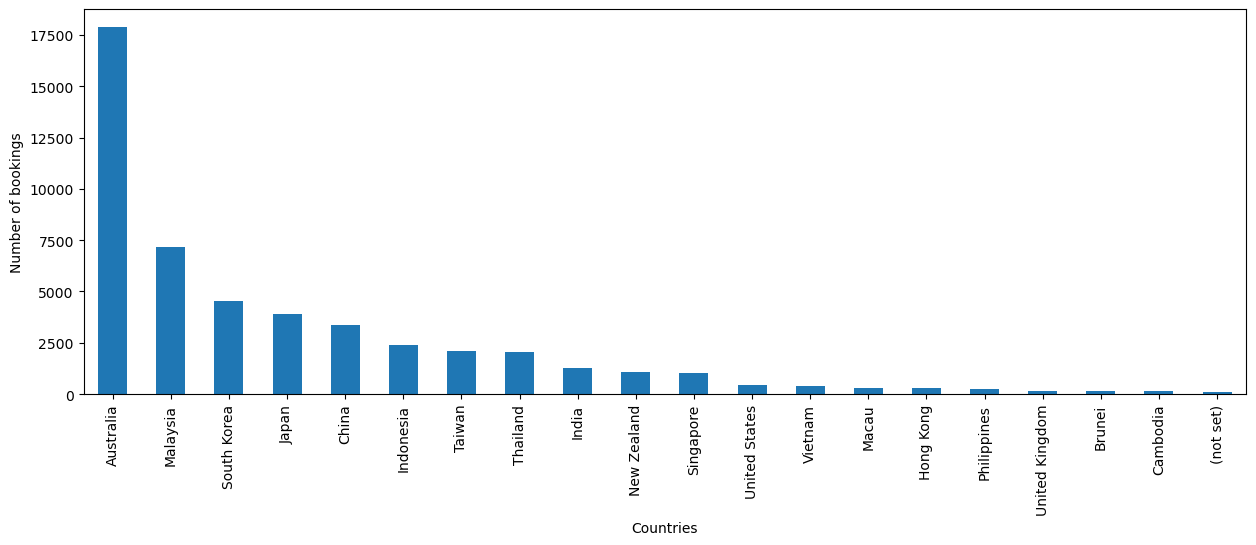

In [139]:
plt.figure(figsize=(15,5))
ax = df.booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of bookings")

Text(0, 0.5, 'Number of complete bookings')

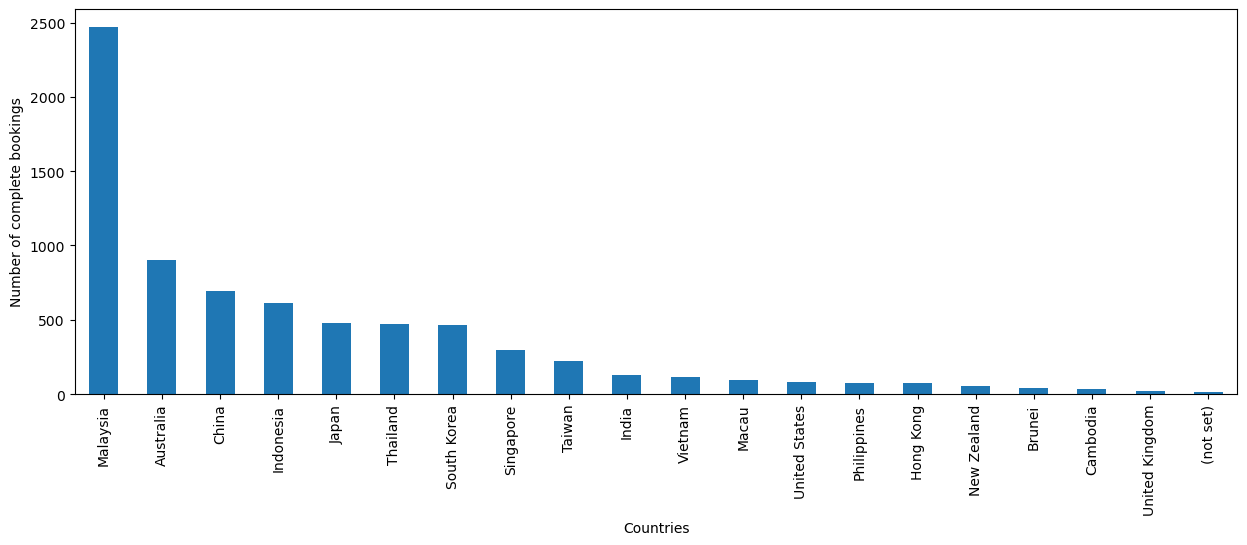

In [140]:
plt.figure(figsize=(15,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

In [141]:
successful_booking_per = df.booking_complete.value_counts().values[0] / len(df) * 100
unsuccessful_booking_per = 100-successful_booking_per

In [142]:
print(f"Out of 50000 booking entries only {round(unsuccessful_booking_per,2)} % bookings were successfull or complete.")

Out of 50000 booking entries only 14.96 % bookings were successfull or complete.


In [143]:

df.to_csv(cwd + "/filtered_customer_booking.csv")

In [144]:
cwd = os.getcwd()

df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [145]:
df = df.reset_index(drop=True)

In [146]:
df_final = df

In [147]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_final = df_final.join(encoder_df)

In [148]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [149]:

#store the label for supervised learning
label = df['booking_complete']

In [150]:
df_final = df_final.drop('booking_complete', axis=1)


In [151]:

df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [152]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [153]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)


In [154]:
# add the labels back to the dataframe
scaled_df['label']  = label

In [155]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


<Axes: >

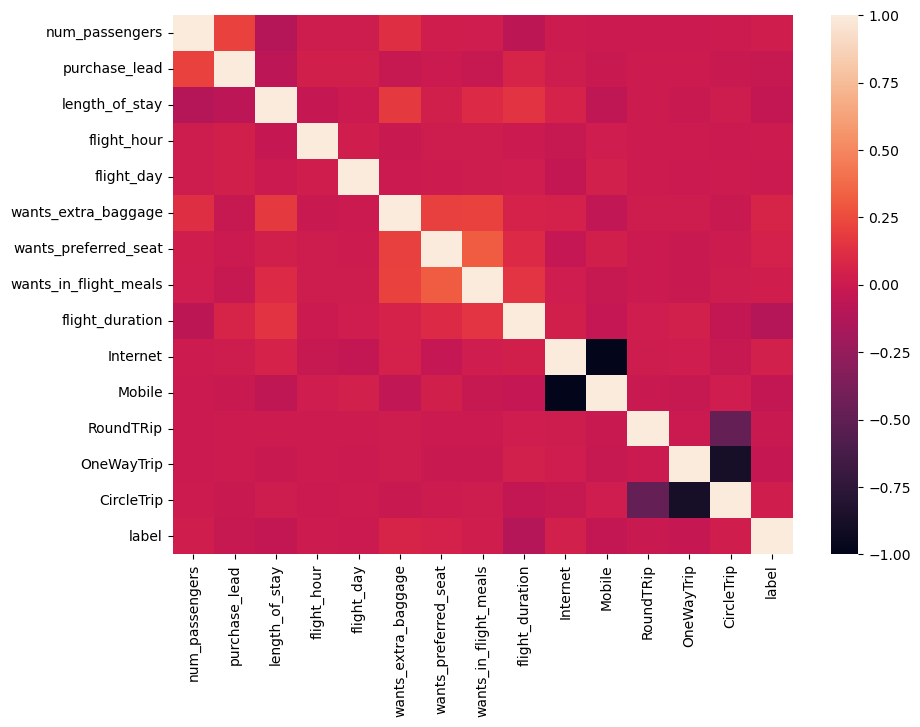

In [156]:

corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

In [157]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

"""
    Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.

"""

def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

In [163]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

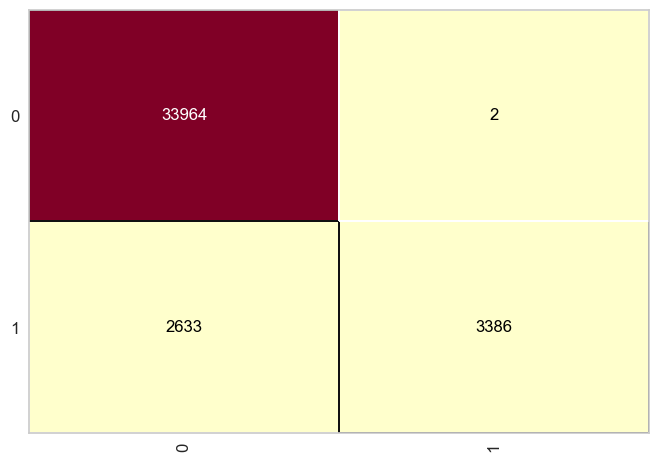

In [164]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

In [165]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

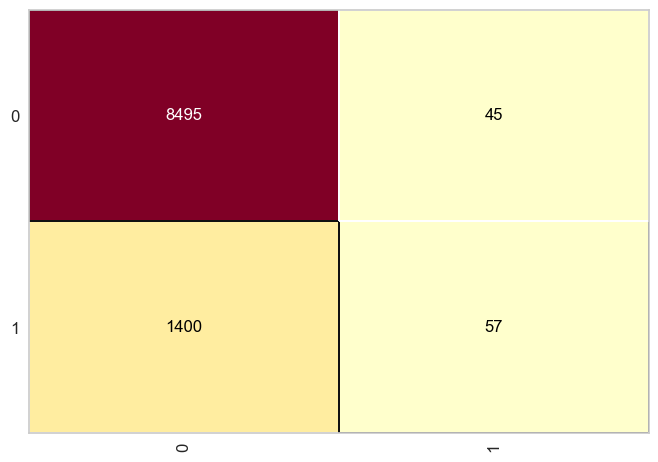

In [166]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

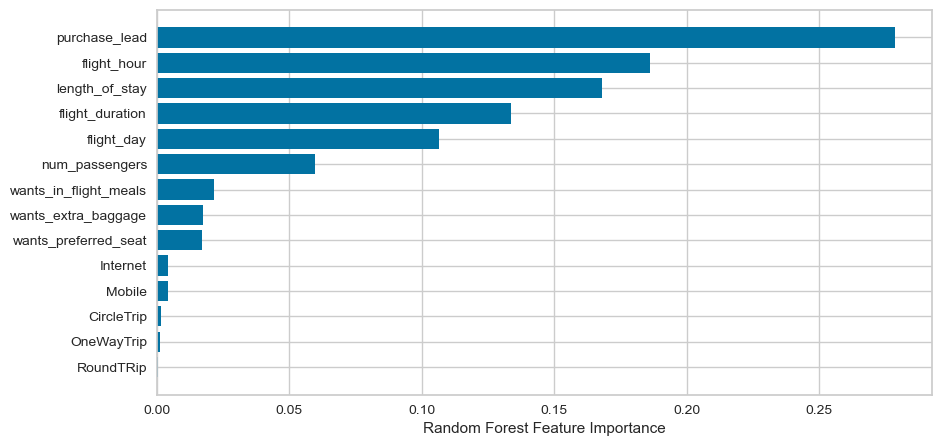

In [167]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [168]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [169]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [170]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [171]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip,label
0,0.400769,-0.764600,-0.502969,0.726958,-1.412280,0.703587,-0.650054,1.158002,-1.688475,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
1,0.400769,1.181523,0.234662,0.911715,0.093214,-1.421288,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,-0.579424,-0.175203,0.529715,-0.381588,1.598707,0.703587,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,0.400769,-0.597789,-0.561979,-0.196830,0.595045,-1.421288,-0.650054,-0.863557,-1.741921,-2.810681,2.810681,-0.048231,-0.088336,0.100826,1
4,-0.579424,0.947988,-0.148906,0.172685,-1.412280,-1.421288,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,0.400769,-0.063996,-0.532474,1.650746,-0.910449,0.703587,1.538334,1.158002,0.095314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15472,-0.579424,2.249110,-0.178411,1.096473,1.096876,0.703587,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15473,0.400769,-0.797962,-0.561979,-0.381588,-0.910449,0.703587,1.538334,1.158002,-1.300985,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15474,-0.579424,1.693075,-0.532474,-0.012073,-0.910449,-1.421288,1.538334,-0.863557,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1


In [173]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [174]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [175]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for training data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively") 

Accuracy, precision, recall and f1-score for training data are 0.63, 0.63, 0.6, 0.66 and 0.61 respectively


0.6314599483204134

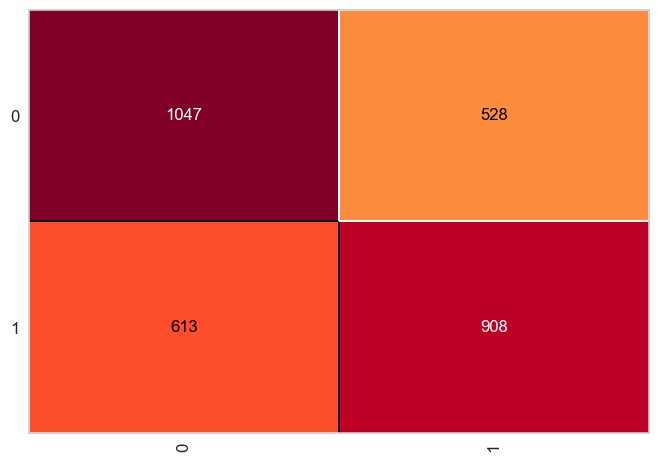

In [176]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

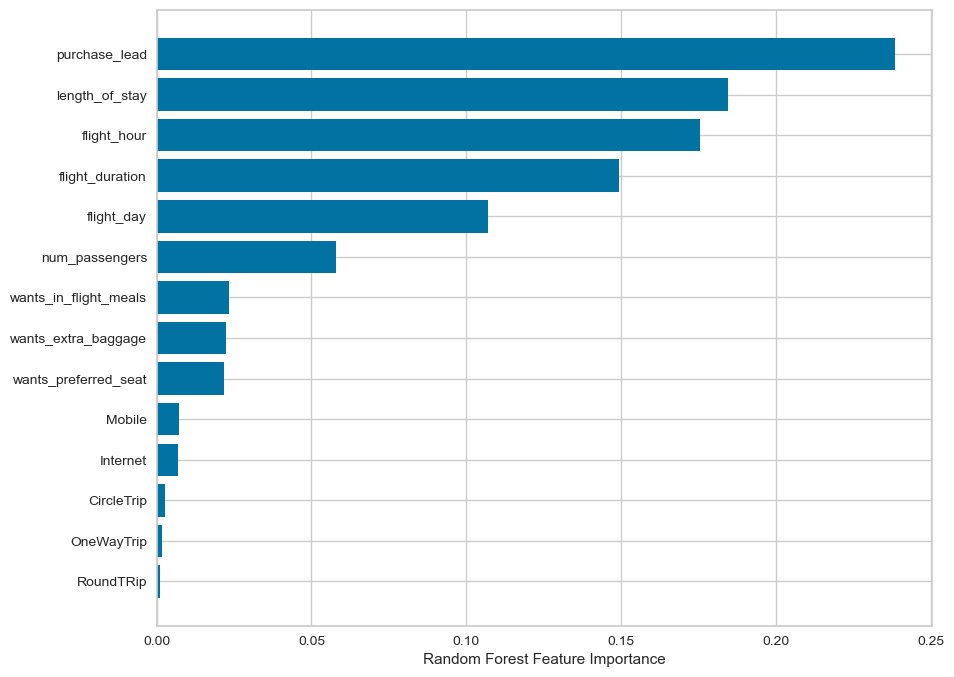

In [177]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")